<a href="https://colab.research.google.com/github/sheldonbirkett/econ499/blob/main/ECON_499_ACS_IPUMS_NHGIS_GeoMAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ACS IPUMS NHGIS

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 13 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [71]:
import pandas as pd
import numpy as np
import re
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon, LineString
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def import_csv(content):
  """Read in csv as a dataframe"""
  acs_data = pd.read_csv(content, encoding= 'unicode_escape')
  return acs_data

In [29]:
def rename_variables(dataframe, dictionary):
  """Renames columns of a dataframe given dictionary"""
  dataframe = dataframe.rename(columns = dictionary)
  return dataframe

In [36]:
def strip_dict_keys_values(d):
    """To remove white-space in keys and values in dictionary"""
    def strip_list(l):
        return [strip_dict_keys_values(x)
                if isinstance(x, dict) else strip_list(x)
                if isinstance(x, list) else clean(x) for x in l]

    def clean(value):
        if isinstance(value, str):
            return value.strip()
        return value

    return {key.strip(): strip_dict_keys_values(value)
            if isinstance(value, dict) else strip_list(value)
            if isinstance(value, list) else clean(value)
            if value is None else clean(value)
            for key, value in d.items()}

In [60]:
def block_groups(list_bg_data):
  """Takes in list of block group shapefiles return files concat together for 11 states."""
  block_group_shp = [0]*11
  for i in range(len(list_bg_data)):
    block_group_shp[i] = gpd.read_file(list_bg_data[i])

  block_group_con = pd.concat(block_group_shp, axis = 0)
  block_group_con = block_group_con.reset_index()
  
  return block_group_con

In [ ]:
ACS5_2019 = import_csv('/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_csv/nhgis0002_ds244_20195_2019_blck_grp.csv')

In [ ]:
ACS5_2014 = import_csv('/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_csv/nhgis0001_ds206_20145_2014_blck_grp.csv')

In [15]:
ACS5_2019_names = import_csv('/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_csv/nhgis_2019_varaible_names.csv')
ACS5_2014_names = import_csv('/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_csv/nhgis_2014_variable_names.csv')

Code below to rename variables from GIS names. 

In [19]:
ACS5_2019_names = ACS5_2019_names.drop(columns = ['1','2','3','4','5','6','7','8','9'])
ACS5_2014_names = ACS5_2014_names.drop(columns = ['1','2','3','4','5','6','7','8','9'])

In [39]:
dictionary_2019 = dict(ACS5_2019_names.values.tolist())
dictionary_2014 = dict(ACS5_2014_names.values.tolist())

In [40]:
dictionary_2019_new = strip_dict_keys_values(dictionary_2019) # remove whitespace from dictionary. 
dictionary_2014_new = strip_dict_keys_values(dictionary_2014) # remove whitespace from dictionary. 


In [41]:
ACS5_2019_new = rename_variables(ACS5_2019, dictionary_2019_new) #rename variables, variables with ending in M are margins of error. 
ACS5_2014_new = rename_variables(ACS5_2014, dictionary_2014_new)

In [43]:
block_groups_2019 = ['/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_040_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_060_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_080_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_160_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_300_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_320_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_350_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_410_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_490_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_530_blck_grp_2019.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2019_nhgis0002_shape/nhgis0002_shapefile_tl2019_560_blck_grp_2019.zip']
block_groups_2014 = ['/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_040_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_060_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_080_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_160_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_300_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_320_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_350_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_410_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_490_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_530_blck_grp_2014.zip','/content/drive/MyDrive/Colab Notebooks/ACS_IPUMS_NHGIS_Data/ACS5_2014_nhgis0001_shape/nhgis0001_shapefile_tl2014_560_blck_grp_2014.zip']

In [61]:
ACS5_2019_block_groups = block_groups(block_groups_2019)
ACS5_2014_block_groups = block_groups(block_groups_2014)

In [64]:
ACS5_2019_bg = pd.merge(ACS5_2019, ACS5_2019_block_groups, on = ['GISJOIN'], how = "left") #Joining block groups with ACS5 data. 
ACS5_2014_bg = pd.merge(ACS5_2014, ACS5_2014_block_groups, on = ['GISJOIN'], how = "left")

In [69]:
wildfire_perimeters = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Historic_GeoMAC_Perimeters_Combined_2000-2018-shp/US_HIST_FIRE_PERIMTRS_2000_2018_DD83.shp")
wildfire_perimeters

,FID,agency,comments,mapmethod,datecurren,uniquefire,fireyear,incidentna,pooownerun,perimeterd,gisacres,complexnam,firecode,complexpar,poorespons,state,inciwebid,localincid,irwinid,incomplex,complexfir,SHAPE_Leng,SHAPE_Area,geometry
0,1,USFS,WFDSS,GPS-Walked/ Driven,2018-02-14,2018-AZCNF-000059,2018,BOX,AZCNF,2018-02-12,79.73,None,LK58,None,AZCNF,AZ,None,000059,{9A5CFD7A-5C05-40E6-A617-088B44A41174},N,None,2.58e-02,3.07e-05,"POLYGON ((-110.84899 31.77031, -110.84937 31.7..."
1,2,USFS,WFDSS,GPS-Walked/ Driven,2018-04-06,2018-AROUF-000688,2018,Zoe,AROUF,2018-04-05,0.20,None,LMT8,None,AROUF,OK,None,000688,{5AFC28D0-6193-4103-AE00-65F4E659CA55},N,None,1.29e-03,8.05e-08,"POLYGON ((-94.57675 34.78029, -94.57685 34.780..."
2,3,C&L,WFDSS,Hand Sketch,2017-04-24,2017-CORBX-000061,2017,Milemarker 24,None,2017-04-21,83.00,None,None,None,CORBX,CO,None,000061,{9C1A9E10-8FA8-4166-A212-EAF39A860469},N,None,3.75e-02,3.54e-05,"POLYGON ((-107.59472 40.00728, -107.59467 40.0..."
3,4,BLM,None,GPS-Walked,2017-07-13,2017-IDIFD-017076,2017,Buffalo Jump,None,2017-06-25,5.48,None,K20G,None,IDIFD,ID,None,017076,{833B0C23-A630-4181-A76C-3451386E970E},N,None,1.36e-02,2.51e-06,"POLYGON ((-114.22769 44.44964, -114.22769 44.4..."
4,5,DFR,WFDSS; This is a heads up drawing based on EGP...,Image Interpretation,2017-02-06,2017-NCNCS-170004,2017,SUGAR COVE,NCNCS,2017-01-30,126.73,None,KU8Q,None,NCNCS,NC,None,170004,{76278212-B950-430A-8042-4F8C239DCEA2},N,None,2.64e-02,5.11e-05,"POLYGON ((-82.14783 35.74547, -82.14921 35.746..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23771,23772,USFS,None,Unknown,2014-08-15,2014-CAKNF-005564,2014,Waterfall,None,2014-08-15,6.09,July Complex,None,{C60F8D84-5F11-4B47-9756-7B44C56BBA8F},CAKNF,CA,4035,005564,{C60F8D84-5F11-4B47-9756-7B44C56BBA8F},Y,H91E,1.18e-02,2.66e-06,"MULTIPOLYGON (((-123.13677 41.54026, -123.1369..."
23772,23773,USFS,None,Unknown,2014-09-09,2014-CAKNF-006001,2014,Jackson,None,2014-09-08,28.74,Happy Camp Complex,None,{6787d235-42f9-4973-a979-83d823328d5f},CAKNF,CA,4078,006001,{B4F9BDC8-12C4-4617-9E08-D27828FDB25A},Y,JB1F,2.22e-02,1.26e-05,"POLYGON ((-123.33975 41.86064, -123.33964 41.8..."
23773,23774,USFS,None,Unknown,2014-07-23,2014-CAMDF-000344,2014,Lake,None,2014-07-08,58.10,Modoc July Complex,None,{826d235c-63c2-4204-94db-c28d420a0d1a},CAMDF,CA,3919,000344,None,Y,H6WX,4.25e-02,2.55e-05,"POLYGON ((-121.01979 41.78519, -121.01945 41.7..."
23774,23775,USFS,IR heat perimeter; no entry in FireCode,Infrared Image,2014-09-25,2014-IDNCF-000675,2014,Crew Creek,None,2014-09-23,14.16,None,None,None,IDNCF,ID,None,000675,{23CCE360-8D7E-419F-AF6B-89D88EBB9AE2},N,None,3.50e-02,6.68e-06,"MULTIPOLYGON (((-114.84670 46.19058, -114.8468..."


In [81]:
s = gpd.GeoSeries(ACS5_2019_bg["geometry"])
h = gpd.GeoSeries(ACS5_2014_bg["geometry"])

In [82]:
ACS5_2019_bg["Centroid_2019"] = s.centroid #to get centre points of block groups. 
ACS5_2014_bg["Centroid_2014"] = h.centroid

In [83]:
ACS5_2014_bg

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AITSCEA,ANRCA,CBSAA,CSAA,METDIVA,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,PUMA5A,BTTRA,BTBGA,NAME_E,ABA2E001,ABA2E002,ABA2E003,...,ABHPM007,ABHPM008,ABHPM009,ABHPM010,ABHWM001,ABHWM002,ABHWM003,ABHWM004,ABHWM005,ABHWM006,ABHWM007,ABIHM001,ABISM001,ABITM001,ABIUM001,ABIXM001,ABIXM002,ABIXM003,ABIXM004,ABIXM005,ABIXM006,ABIXM007,ABIXM008,index,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,Centroid_2014
0,G04000109426001,2010-2014,NaN,NaN,Arizona,4,Apache County,1,NaN,NaN,942600,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9426, Apache Count...",777,0,0,...,11,4,8,4,25,24,14,25,18,11,6,NaN,16080.0,48988.0,21617.0,29,9,13,13,13,13,9,27,3868.0,04,001,942600,1,040019426001,Block Group 1,G5030,S,1.09e+09,2.08e+05,+36.6525496,-109.8475829,201634.79,1.09e+09,"POLYGON ((-1205442.684 24822.029, -1205445.870...",POINT (-1221416.732 -3738.398)
1,G04000109426002,2010-2014,NaN,NaN,Arizona,4,Apache County,1,NaN,NaN,942600,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9426, Apache Count...",695,0,0,...,7,3,6,13,21,20,16,20,24,10,5,NaN,9829.0,17091.0,16226.0,26,9,13,13,13,13,9,27,3884.0,04,001,942600,2,040019426002,Block Group 2,G5030,S,4.31e+08,2.71e+05,+36.9353993,-109.9078833,97724.57,4.31e+08,"POLYGON ((-1204495.868 30826.530, -1204495.796...",POINT (-1221054.350 23756.485)
2,G04000109427001,2010-2014,NaN,NaN,Arizona,4,Apache County,1,NaN,NaN,942700,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9427, Apache Count...",889,0,0,...,19,16,13,13,34,23,25,23,27,18,3,89.0,9967.0,17955.0,17249.0,32,16,13,13,13,13,16,30,4052.0,04,001,942700,1,040019427001,Block Group 1,G5030,S,4.50e+08,7.55e+05,+36.9101983,-109.1774307,125333.38,4.51e+08,"POLYGON ((-1146479.879 22679.806, -1146481.704...",POINT (-1159286.080 14531.663)
3,G04000109427002,2010-2014,NaN,NaN,Arizona,4,Apache County,1,NaN,NaN,942700,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9427, Apache Count...",1601,50,0,...,23,13,10,6,44,33,27,35,29,19,11,86.0,4707.0,8307.0,15149.0,44,14,13,13,13,13,14,44,4049.0,04,001,942700,2,040019427002,Block Group 2,G5030,S,1.16e+09,3.46e+05,+36.7703339,-109.6112269,335102.77,1.16e+09,"POLYGON ((-1170443.973 26051.139, -1170468.175...",POINT (-1198379.238 2845.721)
4,G04000109427003,2010-2014,NaN,NaN,Arizona,4,Apache County,1,NaN,NaN,942700,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 3, Census Tract 9427, Apache Count...",894,4,0,...,15,13,8,13,34,28,20,29,26,15,9,364.0,4833.0,34252.0,19754.0,36,9,13,13,13,13,9,35,4053.0,04,001,942700,3,040019427003,Block Group 3,G5030,S,5.31e+08,2.62e+05,+36.8300288,-109.3653458,161224.56,5.32e+08,"POLYGON ((-1170140.302 21362.100, -1170059.640...",POINT (-1178077.742 7586.633)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45524,G56004509511001,2010-2014,NaN,NaN,Wyoming,56,Weston County,45,NaN,NaN,951100,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9511, Weston Count...",1350,1327,0,...,25,52,22,35,123,24,43,60,82,61,21,304.0,13050.0,20795.0,49887.0,112,84,22,14,16,11,80,62,369.0,56,045,951100,1,560459511001,Block Group 1,G5030,S,1.99e+09,1.

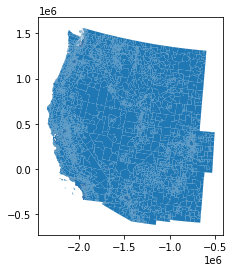

In [85]:
s.plot()